In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import trange
from matplotlib.pyplot import figure



In [ ]:
os.chdir("HD_eventprop_output")

100%|██████████| 50/50 [00:11<00:00,  4.24it/s]


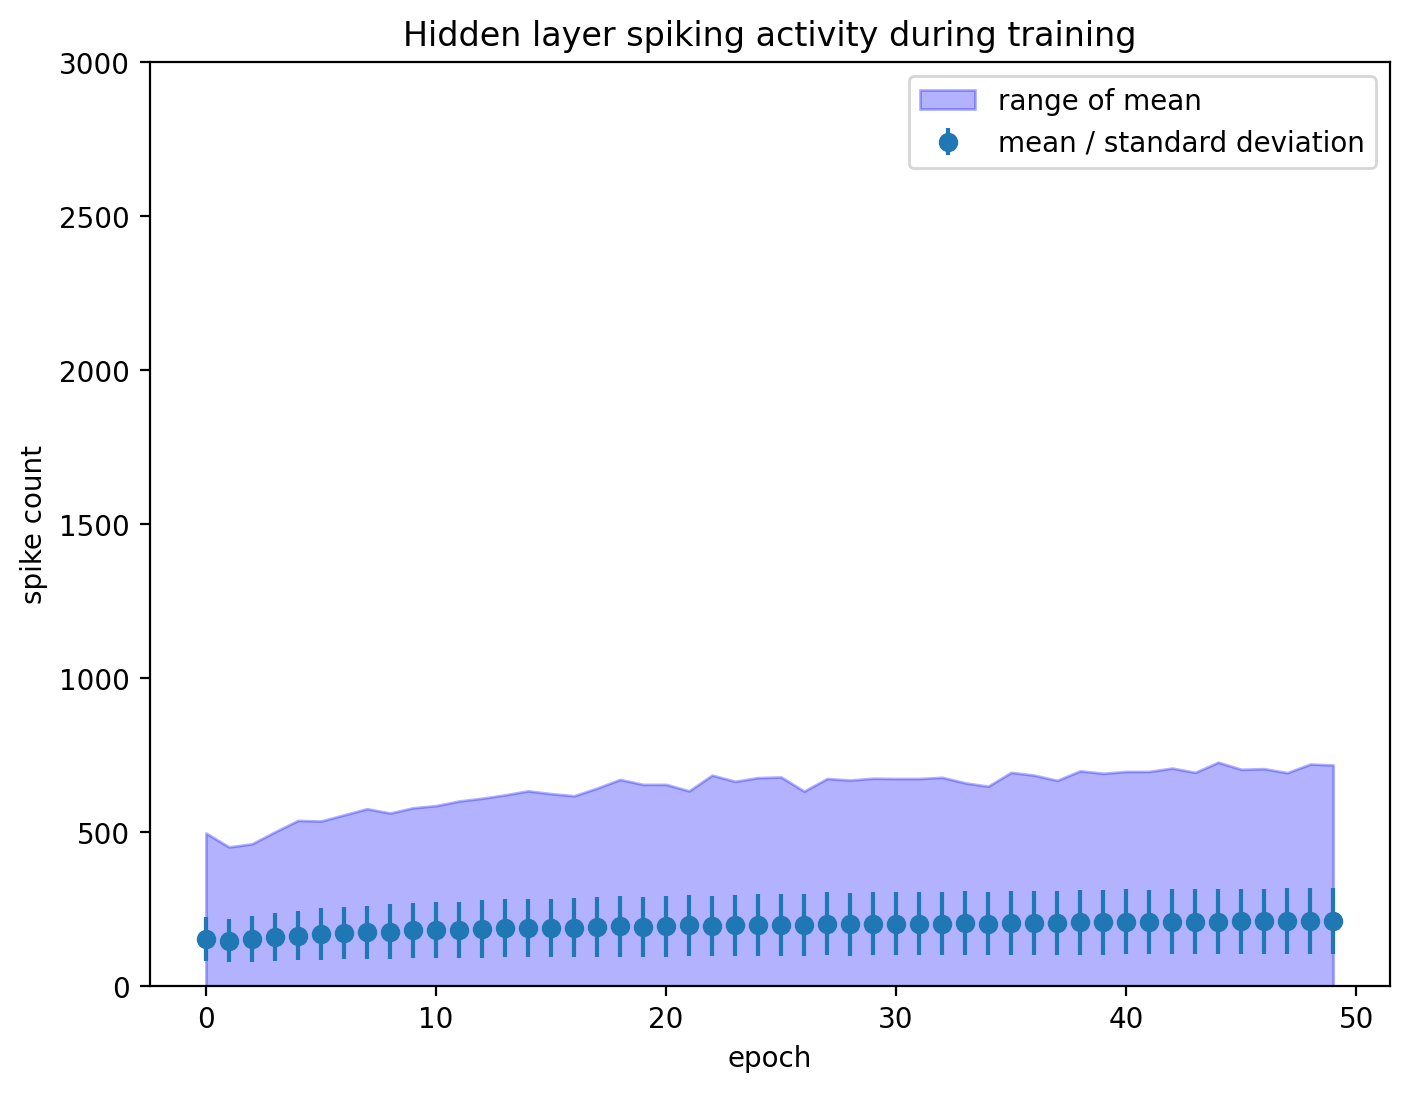

In [9]:


with open('hidden_spike_counts_wo_reg.npy', 'rb') as f:

    hidden_spike_counts = np.load(f)

# plot mean spikes per epoch
epochs = 50
samples_per_epoch = int(len(hidden_spike_counts) / epochs) #epochs
mean_spikes_per_epoch = []
mean_min, mean_max = [], []
std_spikes_per_epoch = []
std_min, std_max = [], []

for e in trange(epochs):
    total_number_of_spikes = []
    m_min = np.sum(hidden_spike_counts[(e * samples_per_epoch)])
    m_max = np.sum(hidden_spike_counts[(e * samples_per_epoch)])
    s_min = np.std(hidden_spike_counts[(e * samples_per_epoch)])
    s_max = np.std(hidden_spike_counts[(e * samples_per_epoch)])
    
    for s in range(samples_per_epoch):
        if s < 8156: #due to additional values stored between 8156 and epoch size 
            no_of_spikes = np.sum(hidden_spike_counts[(e * samples_per_epoch) + s])
            sd_of_spikes = np.std(hidden_spike_counts[(e * samples_per_epoch) + s])
            
            if no_of_spikes > m_max:
                m_max = no_of_spikes
            if no_of_spikes < m_min:
                m_min = no_of_spikes                     
                                
            total_number_of_spikes.append(np.sum(hidden_spike_counts[(e * samples_per_epoch) + s]))
                    
    mean_spikes_per_epoch.append(np.sum(total_number_of_spikes) / samples_per_epoch)
    mean_min.append(m_min)
    mean_max.append(m_max)
    std_min.append(s_min)
    std_max.append(s_max)
    std_spikes_per_epoch.append(np.std(total_number_of_spikes))
    
#plt.plot(mean_spikes_per_epoch, label = "mean")
figure(figsize=(8, 6), dpi=200)
plt.errorbar(list(range(epochs)), mean_spikes_per_epoch, std_spikes_per_epoch, fmt='o', label = "mean / standard deviation")
#plt.plot(std_spikes_per_epoch, label = "std")
plt.fill_between(list(range(epochs)), mean_max, mean_min, alpha = 0.3, color = "blue", label = "range of mean")
plt.xlabel("epoch")
plt.ylabel("spike count")
plt.legend()
plt.title("Hidden layer spiking activity during training")
plt.ylim(0, 3000)
plt.show()

In [ ]:

with open('hidden_spike_counts.npy', 'rb') as f:

    hidden_spike_counts = np.load(f)

# plot mean spikes per epoch
epochs = 50
samples_per_epoch = int(len(hidden_spike_counts) / epochs) #epochs
mean_spikes_per_epoch = []
mean_min, mean_max = [], []
std_spikes_per_epoch = []

for e in trange(epochs):
    total_number_of_spikes = []
    m_min = np.sum(hidden_spike_counts[(e * samples_per_epoch)])
    m_max = np.sum(hidden_spike_counts[(e * samples_per_epoch)])
    
    for s in range(samples_per_epoch):
        if s < 8156: #due to additional values stored between 8156 and epoch size 
            no_of_spikes = np.sum(hidden_spike_counts[(e * samples_per_epoch) + s])
            sd_of_spikes = np.std(hidden_spike_counts[(e * samples_per_epoch) + s])
            
            if no_of_spikes > m_max:
                m_max = no_of_spikes
            if no_of_spikes < m_min:
                m_min = no_of_spikes                     
                                
            total_number_of_spikes.append(np.sum(hidden_spike_counts[(e * samples_per_epoch) + s]))
        
    mean_spikes_per_epoch.append(np.sum(total_number_of_spikes) / samples_per_epoch)
    mean_min.append(m_min)
    mean_max.append(m_max)
    std_spikes_per_epoch.append(np.std(total_number_of_spikes))
    
#plt.plot(mean_spikes_per_epoch, label = "mean")
plt.errorbar(list(range(epochs)), mean_spikes_per_epoch, std_spikes_per_epoch, fmt='o')
#plt.plot(std_spikes_per_epoch, label = "std")
plt.fill_between(list(range(epochs)), mean_max, mean_min, alpha = 0.3, color = "blue", label = "range of mean")
plt.xlabel("epoch")
plt.legend()
plt.title("mean spikes per epoch with regularisation")
plt.show()

In [3]:
# for cross validation

os.chdir("HD_eventprop_cross_validation_output")

In [4]:

with open('hidden_spike_counts.npy', 'rb') as f:

    hidden_spike_counts = np.load(f)

# plot mean spikes per epoch
epochs = 50
samples_per_epoch = int(len(hidden_spike_counts) / epochs) #epochs
mean_spikes_per_epoch = []
mean_min, mean_max = [], []
std_spikes_per_epoch = []

for e in trange(epochs):
    total_number_of_spikes = []
    m_min = np.sum(hidden_spike_counts[(e * samples_per_epoch)])
    m_max = np.sum(hidden_spike_counts[(e * samples_per_epoch)])
    
    for s in range(samples_per_epoch):
        if s < 8156: #due to additional values stored between 8156 and epoch size 
            no_of_spikes = np.sum(hidden_spike_counts[(e * samples_per_epoch) + s])
            sd_of_spikes = np.std(hidden_spike_counts[(e * samples_per_epoch) + s])
            
            if no_of_spikes > m_max:
                m_max = no_of_spikes
            if no_of_spikes < m_min:
                m_min = no_of_spikes                     
                                
            total_number_of_spikes.append(np.sum(hidden_spike_counts[(e * samples_per_epoch) + s]))
        
    mean_spikes_per_epoch.append(np.sum(total_number_of_spikes) / samples_per_epoch)
    mean_min.append(m_min)
    mean_max.append(m_max)
    std_spikes_per_epoch.append(np.std(total_number_of_spikes))
    


100%|██████████| 50/50 [00:11<00:00,  4.21it/s]


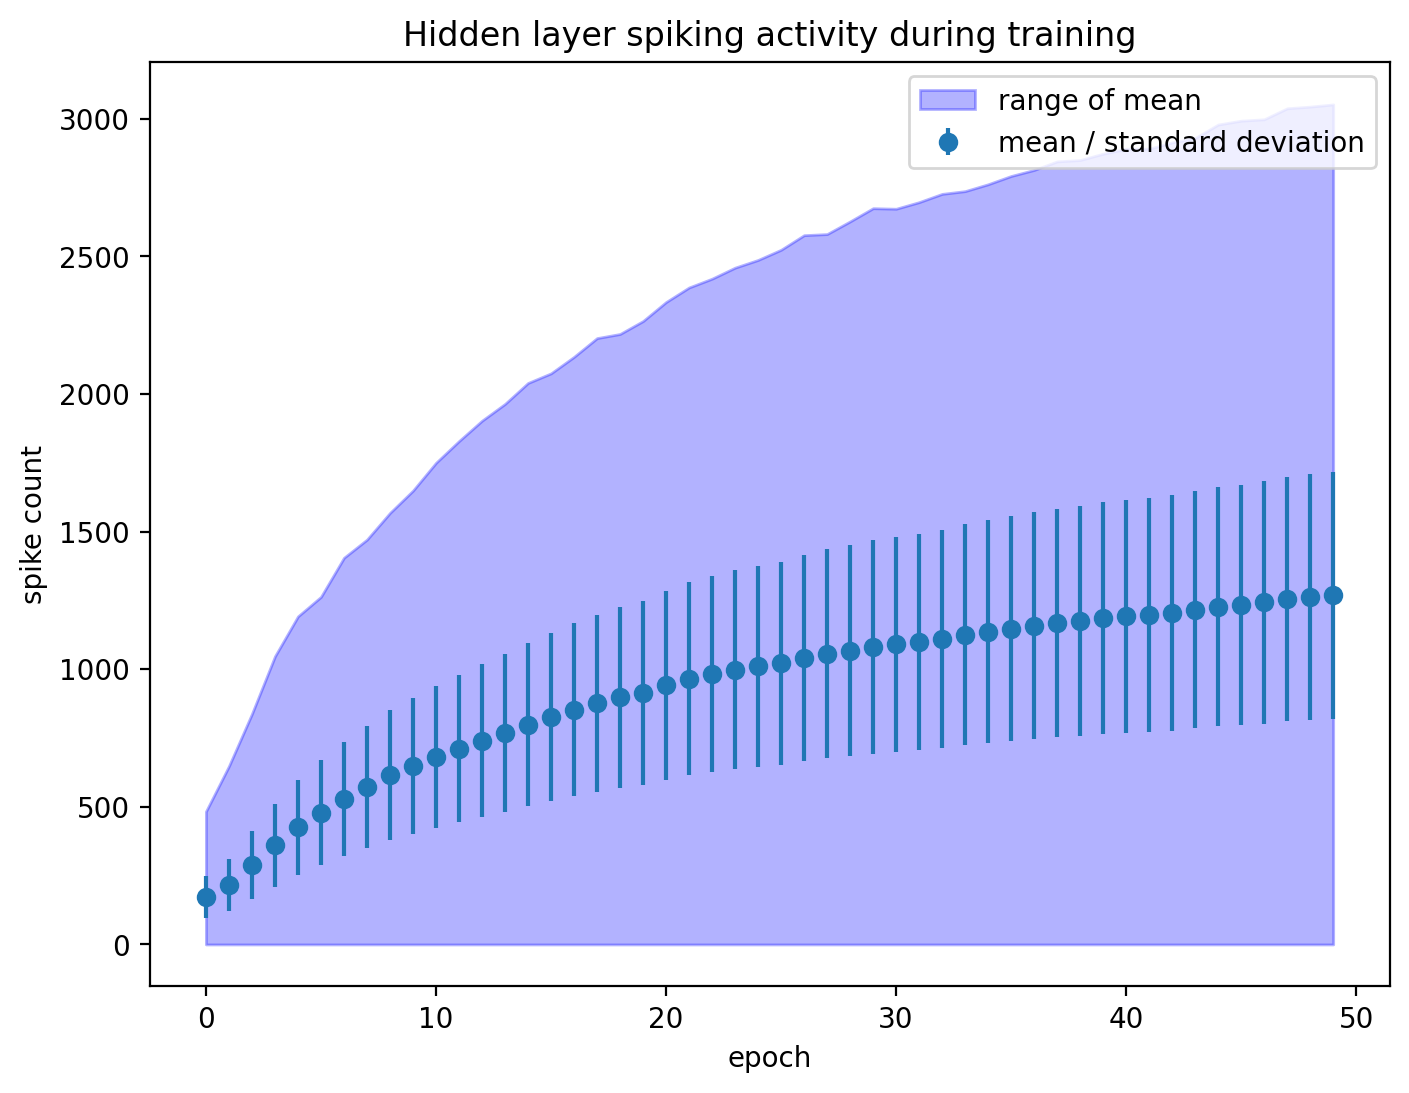

In [6]:
#plt.plot(mean_spikes_per_epoch, label = "mean")
figure(figsize=(8, 6), dpi=200)
plt.errorbar(list(range(epochs)), mean_spikes_per_epoch, std_spikes_per_epoch, fmt='o', label = "mean / standard deviation")
#plt.plot(std_spikes_per_epoch, label = "std")
plt.fill_between(list(range(epochs)), mean_max, mean_min, alpha = 0.3, color = "blue", label = "range of mean")
plt.xlabel("epoch")
plt.ylabel("spike count")
plt.legend()
plt.title("Hidden layer spiking activity during training")
plt.show()